Instructions for students:

Run each cell in this notebook, one by one, reading the comment above the cell first. This will aid in understanding what the code is doing.

After running all cells, try experimenting with the network architecture. Try adding more layers or changing the number of units in the layer. Can you increase the performance of the model?

# Introduction to Convolutional Neural Networks

## Introduction to convnets

Convolutional Neural Networks (CNNs) are a class of deep learning models designed primarily for processing structured grid-like data, such as images. They have been particularly successful in tasks like image recognition, object detection, and segmentation.

Convolutional Layer: The core building block of CNNs is the convolutional layer. This layer applies a set of filters (also known as kernels) to the input image. Each filter slides (or convolves) across the input image, computing element-wise multiplications and summing up the results to produce a feature map. These filters capture different features such as edges, textures, or patterns.

**Instantiating a small convnet**

In [1]:
!pip install kaggle

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

**Displaying the model's summary**

In [3]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

**Training the convnet on MNIST images**

In [4]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 14s 9ms/step - loss: 0.1618 - accuracy: 0.9499
Epoch 2/5
938/938 [==============================] - 8s 8ms/step - loss: 0.0443 - accuracy: 0.9861
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0308 - accuracy: 0.9909
Epoch 4/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0230 - accuracy: 0.9929
Epoch 5/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0180 - accuracy: 0.9946


**Evaluating the convnet**

In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0246 - accuracy: 0.9918
Test accuracy: 0.992


As in the simple example above, we can see the effectiveness of convolutional networks on the MNIST dataset.

### The convolution operation

The convolution operation is at the heart of Convolutional Neural Networks (CNNs) and is the fundamental building block for extracting features from input data, especially images.

Filters (Kernels): The convolution operation involves applying a small filter (also known as a kernel) to an input image. These filters are typically small-sized matrices (e.g., 3x3 or 5x5) containing numerical values.

Sliding Window: The filter is systematically slid or convolved across the input image, moving pixel by pixel, and at each position, an element-wise multiplication is performed between the filter and the overlapping region of the input image.

Element-wise Multiplication and Summation: At each position, the element-wise multiplication is performed between the filter and the corresponding region of the input image. The results of these multiplications are then summed up to produce a single value for that position in the output feature map.

Strides: Stride refers to the number of pixels the filter moves at each step while performing convolution. A stride of 1 means the filter moves one pixel at a time, producing feature maps with the same spatial dimensions as the input. Larger stride values result in smaller feature maps.

Padding: Padding is often applied to the input image to ensure that the output feature map has the same spatial dimensions as the input. Padding involves adding additional rows and columns of zeros around the input image. Zero-padding is the most common type of padding used in CNNs.

Feature Map: After performing the convolution operation across all positions of the input image, a feature map is generated. Each element in the feature map represents the result of applying the filter to a specific region of the input image, capturing certain patterns or features.

Multiple Filters: In practice, CNNs use multiple filters in each convolutional layer. Each filter captures different features from the input image. For example, one filter might detect edges, while another might detect textures. The output feature map of each filter provides a set of feature representations extracted from the input image.

By repeatedly applying convolution operations with different filters and stacking multiple convolutional layers, CNNs can learn hierarchical representations of features, starting from simple patterns like edges and textures in the early layers, to more complex and abstract features in deeper layers. These learned features are crucial for tasks such as image recognition, object detection, and image segmentation.

### The max-pooling operation

Pooling Layer: Pooling layers are used to downsample the feature maps produced by the convolutional layers, reducing the spatial dimensions (width and height). The most common pooling operation is max pooling, where the maximum value within a small region (e.g., 2x2) is retained, while others are discarded. Pooling helps to reduce computational complexity, control overfitting, and make the network more robust to small variations in input.

**An incorrectly structured convnet missing its max-pooling layers**

In [6]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [7]:
model_no_max_pool.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 61952)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712202 (2.72 MB)
Trainable params: 712202 (2.

In [8]:
model_no_max_pool.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model_no_max_pool.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 9s 8ms/step - loss: 0.1244 - accuracy: 0.9631
Epoch 2/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0437 - accuracy: 0.9868
Epoch 3/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0302 - accuracy: 0.9908
Epoch 4/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0223 - accuracy: 0.9933
Epoch 5/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0167 - accuracy: 0.9952


In [9]:
test_loss, test_acc = model_no_max_pool.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 4ms/step - loss: 0.0459 - accuracy: 0.9867
Test accuracy: 0.987


## Training a convnet from scratch on a small dataset

### The relevance of deep learning for small-data problems

### Downloading the data

The Dogs vs Cats dataset is a popular benchmark dataset in the field of computer vision, particularly for image classification tasks. It contains a large collection of labeled images of dogs and cats. Each image is categorized into one of the two classes: "dog" or "cat".

Researchers and machine learning practitioners commonly use this dataset for training and evaluating image classification algorithms, especially convolutional neural networks (CNNs).

Despite its apparent simplicity, the Dogs vs Cats dataset presents several challenges, including variations in pose, lighting conditions, background clutter, and differences in breed and appearance within each class.

Due to its widespread use, the Dogs vs Cats dataset serves as a benchmark for evaluating the performance of image classification models. Researchers often report their results on this dataset to compare the effectiveness of different approaches.


To download the data:
First navigate to the kaggle website in your web browser, log in and go to the My Account page. In your account settings, you will find an API Section. CLick the 'Create New Token' button. This will generate a kaggle.json file and download it to your machine.

Then upload this json file by running the code below:

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"harisml","key":"fac99da22d11f02bd4a0b0d1e41db64e"}'}

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

You may get a 'file exists' error for the above cell. Ignore the error 'File exists' and continue to the next cell.

In [5]:
!kaggle competitions download -c dogs-vs-cats

 99% 808M/812M [00:21<00:00, 36.3MB/s]
100% 812M/812M [00:21<00:00, 39.3MB/s]


In [6]:
!unzip -qq dogs-vs-cats.zip

In [7]:
!unzip -qq train.zip

**Copying images to training, validation, and test directories**

In [8]:
import os, shutil, pathlib

original_dir = os.path.join('train')
new_base_dir = pathlib.Path("/content/cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir_ = new_base_dir / subset_name / category
        if(not os.path.exists(dir_)):
            os.makedirs(dir_)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = os.path.join(original_dir, fname)
            dst_file = os.path.join(dir_, fname)
            shutil.copyfile(src=src_file,
                            dst=dst_file)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

### Building the model

**Instantiating a small convnet for dogs vs. cats classification**

In [18]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [19]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                      

**Configuring the model for training**

In [20]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### Data preprocessing

**Using `image_dataset_from_directory` to read images**

In [21]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [22]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

**Displaying the shapes of the data and labels yielded by the `Dataset`**

In [23]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Fitting the model using a `Dataset`**

In [24]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 13s 88ms/step - loss: 0.7021 - accuracy: 0.5090 - val_loss: 0.6916 - val_accuracy: 0.5020
Epoch 2/30
63/63 [==============================] - 4s 60ms/step - loss: 0.6926 - accuracy: 0.5580 - val_loss: 0.6825 - val_accuracy: 0.6000
Epoch 3/30
63/63 [==============================] - 7s 112ms/step - loss: 0.6814 - accuracy: 0.5690 - val_loss: 0.6603 - val_accuracy: 0.6260
Epoch 4/30
63/63 [==============================] - 5s 65ms/step - loss: 0.6598 - accuracy: 0.6120 - val_loss: 0.6470 - val_accuracy: 0.6300
Epoch 5/30
63/63 [==============================] - 4s 59ms/step - loss: 0.6325 - accuracy: 0.6540 - val_loss: 0.6764 - val_accuracy: 0.5650
Epoch 6/30
63/63 [==============================] - 6s 85ms/step - loss: 0.6057 - accuracy: 0.6755 - val_loss: 0.6906 - val_accuracy: 0.6280
Epoch 7/30
63/63 [==============================] - 6s 89ms/step - loss: 0.5629 - accuracy: 0.7065 - val_loss: 0.6139 - val_accuracy: 0.6440
Epoch 8/30


**Displaying curves of loss and accuracy during training**

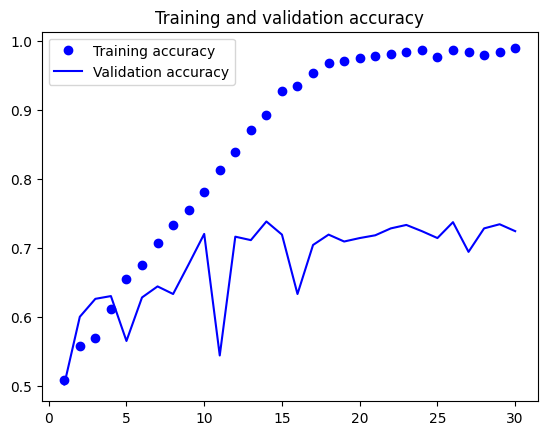

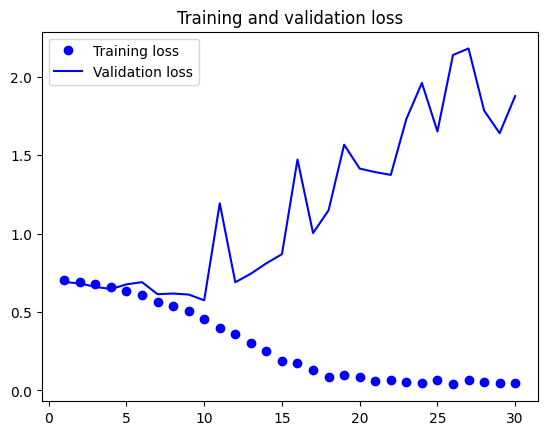

In [25]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [26]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 46ms/step - loss: 0.5831 - accuracy: 0.7220
Test accuracy: 0.722


### Using data augmentation

Data augmentation is a crucial technique in training Convolutional Neural Networks (CNNs) and other deep learning models, particularly in computer vision tasks. Here are some of the benefits of data augmentation for convolutional networks:

Increased Dataset Size: Data augmentation artificially increases the effective size of the training dataset by applying various transformations to the original images, such as rotations, flips, translations, scaling, and changes in brightness or contrast. This expanded dataset helps prevent overfitting by exposing the model to a wider range of variations in the input data.

Improved Generalization: By presenting the model with a more diverse set of examples during training, data augmentation helps improve the model's ability to generalize to unseen data. This is crucial for ensuring that the model performs well on real-world images that may contain variations not present in the original training set.

Robustness to Variations: Data augmentation encourages the model to learn features that are invariant to certain transformations, such as changes in orientation, size, or lighting conditions. This makes the model more robust to variations in the input data and helps it perform well in different scenarios.

Regularization: Data augmentation serves as a form of regularization by introducing noise and perturbations into the training data. This helps prevent the model from memorizing specific details of the training images and encourages it to learn more robust and generalizable features.

Reduced Overfitting: Overfitting occurs when a model learns to memorize the training data instead of generalizing from it. By exposing the model to a more diverse set of examples through data augmentation, overfitting is mitigated, leading to better performance on unseen data.

Training Efficiency: Data augmentation can help improve the efficiency of the training process by reducing the need for collecting and labeling large amounts of diverse training data manually. Instead, a smaller, more manageable dataset can be augmented to generate a larger training set with greater diversity.

Overall, data augmentation plays a crucial role in improving the performance, generalization ability, and robustness of convolutional networks, making it an essential technique in the training pipeline for various computer vision tasks.

**Define a data augmentation stage to add to an image model**

In [29]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

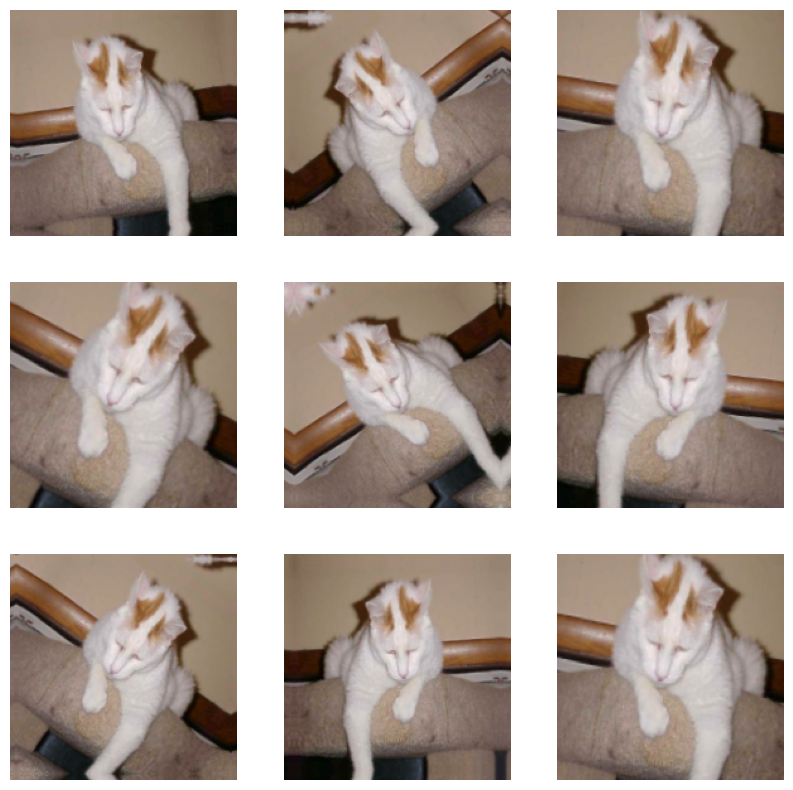

In [30]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [27]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [28]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 9s 74ms/step - loss: 0.7120 - accuracy: 0.4875 - val_loss: 0.6921 - val_accuracy: 0.5150
Epoch 2/100
63/63 [==============================] - 7s 105ms/step - loss: 0.6947 - accuracy: 0.5205 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 3/100
63/63 [==============================] - 6s 80ms/step - loss: 0.6919 - accuracy: 0.5320 - val_loss: 0.6806 - val_accuracy: 0.5620
Epoch 4/100
63/63 [==============================] - 6s 93ms/step - loss: 0.6831 - accuracy: 0.5830 - val_loss: 0.6595 - val_accuracy: 0.6330
Epoch 5/100
63/63 [==============================] - 6s 95ms/step - loss: 0.6696 - accuracy: 0.5980 - val_loss: 0.6497 - val_accuracy: 0.5850
Epoch 6/100
63/63 [==============================] - 4s 64ms/step - loss: 0.6932 - accuracy: 0.6420 - val_loss: 0.6264 - val_accuracy: 0.6370
Epoch 7/100
63/63 [==============================] - 6s 89ms/step - loss: 0.6252 - accuracy: 0.6640 - val_loss: 0.7470 - val_accuracy: 0.5870
Epoch

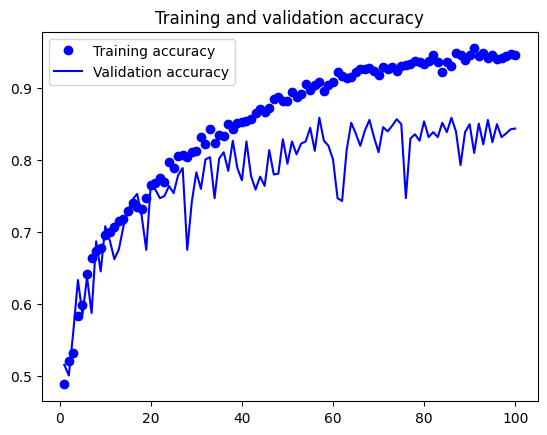

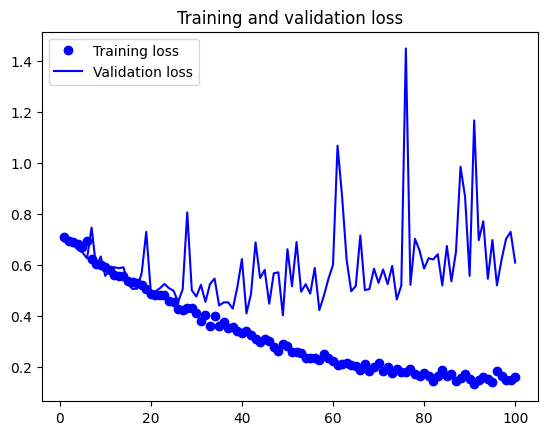

In [29]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [30]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 5s 60ms/step - loss: 0.4908 - accuracy: 0.8070
Test accuracy: 0.807


Compare these results with the previous model above.

Excercise, experimenting with adding more convolutional layers, increasing the number of filters in each layer, adjusting the kernel size, and adding additional dense layers.

In [31]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="improved_model.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)


Epoch 1/100
63/63 [==============================] - 10s 84ms/step - loss: 0.6942 - accuracy: 0.4985 - val_loss: 0.6889 - val_accuracy: 0.5800
Epoch 2/100
63/63 [==============================] - 6s 91ms/step - loss: 0.6944 - accuracy: 0.5150 - val_loss: 0.6911 - val_accuracy: 0.5000
Epoch 3/100
63/63 [==============================] - 4s 58ms/step - loss: 0.6922 - accuracy: 0.5130 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/100
63/63 [==============================] - 4s 58ms/step - loss: 0.6935 - accuracy: 0.5005 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
63/63 [==============================] - 7s 101ms/step - loss: 0.6933 - accuracy: 0.5040 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 6/100


KeyboardInterrupt: 

In [32]:
test_model = keras.models.load_model(
    "improved_model.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 4s 59ms/step - loss: 0.6929 - accuracy: 0.5000
Test accuracy: 0.500


This updated model includes additional convolutional layers, increasing the number of filters in each layer. Additionally, it introduces another dense layer with more units.

In [33]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
inputs = keras.Input(shape=(180, 180, 3))
x = layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# Convolutional layers
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Flatten and Dense layers
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

# Create the model
model = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

# Display model summary
model.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 43, 43, 64)        0         
 ng2D)                                                     

In [34]:
from tensorflow import keras

# Define the callback
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="model_checkpoint.h5",  # Path to save the model weights
        save_best_only=True,  # Save only the best model
        monitor="val_loss",  # Quantity to monitor for saving the best model
        verbose=1  # Verbosity mode
    )
]

# Compile the model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

# Train the model
history = model.fit(
    train_dataset,
    epochs=75,
    validation_data=validation_dataset,
    callbacks=callbacks  # Pass the callback to the fit method
)


Epoch 1/75
62/63 [============================>.] - ETA: 0s - loss: 0.6961 - accuracy: 0.4965
Epoch 1: val_loss improved from inf to 0.69153, saving model to model_checkpoint.h5
63/63 [==============================] - 7s 70ms/step - loss: 0.6961 - accuracy: 0.4965 - val_loss: 0.6915 - val_accuracy: 0.5000
Epoch 2/75


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


62/63 [============================>.] - ETA: 0s - loss: 0.6909 - accuracy: 0.5111
Epoch 2: val_loss improved from 0.69153 to 0.69069, saving model to model_checkpoint.h5
63/63 [==============================] - 5s 75ms/step - loss: 0.6910 - accuracy: 0.5100 - val_loss: 0.6907 - val_accuracy: 0.5000
Epoch 3/75
63/63 [==============================] - ETA: 0s - loss: 0.6920 - accuracy: 0.5070
Epoch 3: val_loss improved from 0.69069 to 0.68743, saving model to model_checkpoint.h5
63/63 [==============================] - 8s 116ms/step - loss: 0.6920 - accuracy: 0.5070 - val_loss: 0.6874 - val_accuracy: 0.5440
Epoch 4/75
63/63 [==============================] - ETA: 0s - loss: 0.6835 - accuracy: 0.5670
Epoch 4: val_loss improved from 0.68743 to 0.67597, saving model to model_checkpoint.h5
63/63 [==============================] - 4s 64ms/step - loss: 0.6835 - accuracy: 0.5670 - val_loss: 0.6760 - val_accuracy: 0.6100
Epoch 5/75
62/63 [============================>.] - ETA: 0s - loss: 0.6841

In [35]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_dataset)

# Print validation loss and accuracy
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


32/32 [==============================] - 2s 51ms/step - loss: 3.0355 - accuracy: 0.7290
Validation Loss: 3.035548686981201
Validation Accuracy: 0.7289999723434448


## Leveraging a pretrained model

### Feature extraction with a pretrained model

Performing feature extraction using a pretrained model involves leveraging a deep learning model that has been trained on a large dataset (such as ImageNet) to extract relevant features from new data without retraining the entire model. Here's how you can perform feature extraction using a pretrained model:

Choose a Pretrained Model: Start by selecting a pretrained deep learning model that is suitable for your task. Common choices include models like VGG, ResNet, Inception, or MobileNet, which have been trained on large-scale image classification tasks.

Load the Pretrained Model: Load the pretrained model weights and architecture into your programming environment using a deep learning library such as TensorFlow, Keras, or PyTorch.

Remove the Top Layers: Pretrained models for image classification typically consist of a feature extraction part (convolutional layers) followed by a classification part (fully connected layers). Since we want to perform feature extraction, we discard the classification part (top layers) of the model, leaving only the feature extraction layers.

Freeze the Layers: To prevent the weights of the feature extraction layers from being updated during training, freeze these layers. This ensures that only the weights of the new layers added for the specific task will be trained.

Extract Features: Pass the new data (images) through the modified pretrained model (with the top layers removed and the remaining layers frozen) to extract features from the data. This is done by forwarding the input data through the model up to a certain layer, typically just before the classification layers.

Use Extracted Features: The output of the chosen layer serves as the extracted features for the new data. You can then use these features as input to a new classifier or other downstream tasks such as clustering or retrieval.

By performing feature extraction using a pretrained model, you can leverage the knowledge learned from large-scale datasets and apply it to your specific task, even with limited training data. This approach is particularly useful when you have limited computational resources or training data available.

**Instantiating the VGG16 convolutional base**

In [32]:
from tensorflow import keras
from tensorflow.keras import layers

In [33]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 2s 0us/step


In [34]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

#### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [39]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 23ms/step


In [40]:
train_features.shape

(2000, 5, 5, 512)

**Defining and training the densely connected classifier**

In [41]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 1s 12ms/step - loss: 19.8628 - accuracy: 0.9260 - val_loss: 3.4808 - val_accuracy: 0.9680
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 3.4233 - accuracy: 0.9755 - val_loss: 5.9952 - val_accuracy: 0.9600
Epoch 3/20
63/63 [==============================] - 1s 8ms/step - loss: 1.6458 - accuracy: 0.9880 - val_loss: 4.1197 - val_accuracy: 0.9760
Epoch 4/20
63/63 [==============================] - 1s 8ms/step - loss: 1.6871 - accuracy: 0.9885 - val_loss: 5.9314 - val_accuracy: 0.9740
Epoch 5/20
63/63 [==============================] - 0s 8ms/step - loss: 0.5307 - accuracy: 0.9935 - val_loss: 4.4935 - val_accuracy: 0.9740
Epoch 6/20
63/63 [==============================] - 1s 10ms/step - loss: 0.9901 - accuracy: 0.9930 - val_loss: 5.9951 - val_accuracy: 0.9710
Epoch 7/20
63/63 [==============================] - 1s 8ms/step - loss: 0.9461 - accuracy: 0.9935 - val_loss: 11.7736 - val_accuracy: 0.9610
Epoch 8/20
63/63

**Plotting the results**

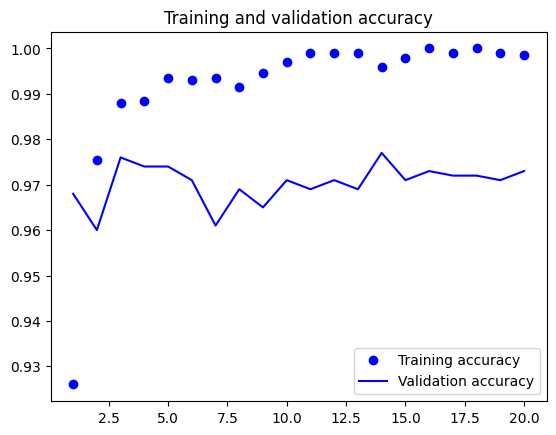

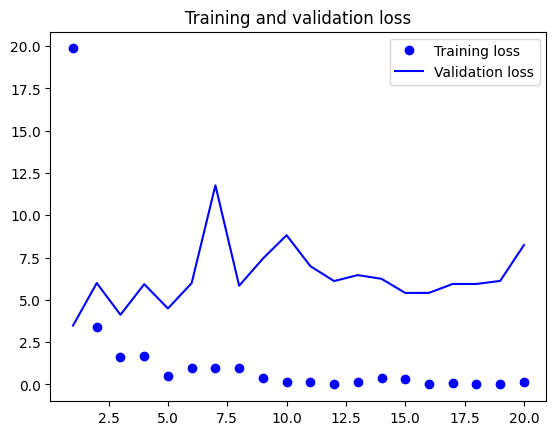

In [42]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [43]:
test_loss, test_acc = model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 0s 3ms/step - loss: 7.5889 - accuracy: 0.9685
Test accuracy: 0.969


Compare these reults with the results in the previous section.

#### Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [35]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [36]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [37]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [38]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [41]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.h5",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 10s 152ms/step - loss: 7.7448 - accuracy: 0.9425 - val_loss: 3.0383 - val_accuracy: 0.9720


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/50
63/63 [==============================] - 11s 179ms/step - loss: 5.8331 - accuracy: 0.9460 - val_loss: 7.0387 - val_accuracy: 0.9640
Epoch 3/50
63/63 [==============================] - 10s 156ms/step - loss: 3.5244 - accuracy: 0.9685 - val_loss: 4.0636 - val_accuracy: 0.9760
Epoch 4/50
63/63 [==============================] - 10s 156ms/step - loss: 3.9279 - accuracy: 0.9680 - val_loss: 3.0225 - val_accuracy: 0.9790
Epoch 5/50
63/63 [==============================] - 10s 153ms/step - loss: 4.4430 - accuracy: 0.9610 - val_loss: 3.8349 - val_accuracy: 0.9760
Epoch 6/50
63/63 [==============================] - 10s 155ms/step - loss: 4.1827 - accuracy: 0.9620 - val_loss: 2.6269 - val_accuracy: 0.9810
Epoch 7/50
63/63 [==============================] - 10s 149ms/step - loss: 1.9000 - accuracy: 0.9780 - val_loss: 3.1769 - val_accuracy: 0.9780
Epoch 8/50
63/63 [==============================] - 12s 184ms/step - loss: 3.3661 - accuracy: 0.9720 - val_loss: 2.1944 - val_accuracy: 0.9810

In [43]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))

# Define data augmentation directly within the model
x = layers.experimental.preprocessing.RandomFlip("horizontal")(inputs)
x = layers.experimental.preprocessing.RandomRotation(0.1)(x)
x = layers.experimental.preprocessing.RandomZoom(0.2)(x)

# Preprocess input for VGG16
x = keras.applications.vgg16.preprocess_input(x)

# Load VGG16 model
conv_base = keras.applications.VGG16(weights="imagenet", include_top=False, input_shape=(180, 180, 3))

# Freeze the convolutional base
conv_base.trainable = False

# Pass the preprocessed input through VGG16 base
x = conv_base(x)

# Flatten the output
x = layers.Flatten()(x)

# Add custom dense layers
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

# Output layer
outputs = layers.Dense(1, activation="sigmoid")(x)

# Create the model
model = keras.Model(inputs, outputs)

# Compile the model
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

# Display model summary
model.summary()

# Define callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.h5",
        save_best_only=True,
        monitor="val_loss")
]

# Train the model
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 random_flip_4 (RandomFlip)  (None, 180, 180, 3)       0         
                                                                 
 random_rotation_4 (RandomR  (None, 180, 180, 3)       0         
 otation)                                                        
                                                                 
 random_zoom_4 (RandomZoom)  (None, 180, 180, 3)       0         
                                                                 
 tf.__operators__.getitem_3  (None, 180, 180, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_3 (TFOpLamb  (None, 180, 180, 3)       0   

In [44]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the data augmentation layers directly within the model
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))

# Apply data augmentation to the input
x = data_augmentation(inputs)

# Preprocess input for VGG16
x = keras.applications.vgg16.preprocess_input(x)

# Load VGG16 model
conv_base = keras.applications.VGG16(weights="imagenet", include_top=False, input_shape=(180, 180, 3))

# Freeze the convolutional base
conv_base.trainable = False

# Pass the preprocessed input through VGG16 base
x = conv_base(x)

# Flatten the output
x = layers.Flatten()(x)

# Add custom dense layers
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

# Output layer
outputs = layers.Dense(1, activation="sigmoid")(x)

# Create the model
model = keras.Model(inputs, outputs)

# Compile the model
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

# Display model summary
model.summary()

# Define callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.h5",
        save_best_only=True,
        monitor="val_loss")
]

# Train the model
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)


Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 tf.__operators__.getitem_4  (None, 180, 180, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_4 (TFOpLamb  (None, 180, 180, 3)       0         
 da)                                                             
                                                                 
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 flatten_7 (Flatten)         (None, 12800)             0   

**Evaluating the model on the test set**

In [47]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.h5")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 8s 99ms/step - loss: 1.9935 - accuracy: 0.9755
Test accuracy: 0.975


### Fine-tuning a pretrained model

In [48]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

**Freezing all layers until the fourth from the last**

In [49]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [55]:
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 tf.__operators__.getitem_4  (None, 180, 180, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_4 (TFOpLamb  (None, 180, 180, 3)       0         
 da)                                                             
                                                                 
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 flatten_7 (Flatten)         (None, 12800)             0   

**Fine-tuning the model**

Fine-tuning a deep learning model involves taking a pretrained model and further training it on a new dataset or task to adapt it to specific needs. This process allows you to leverage the knowledge learned by the pretrained model on a large dataset and apply it to a related but different task.

In [51]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.h5",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 16s 177ms/step - loss: 0.3413 - accuracy: 0.9900 - val_loss: 2.0691 - val_accuracy: 0.9750
Epoch 2/30
63/63 [==============================] - 11s 164ms/step - loss: 0.4113 - accuracy: 0.9870 - val_loss: 2.0890 - val_accuracy: 0.9780
Epoch 3/30
63/63 [==============================] - 11s 169ms/step - loss: 0.3146 - accuracy: 0.9900 - val_loss: 2.6118 - val_accuracy: 0.9730
Epoch 4/30
63/63 [==============================] - 11s 175ms/step - loss: 0.2956 - accuracy: 0.9910 - val_loss: 2.2277 - val_accuracy: 0.9760
Epoch 5/30
63/63 [==============================] - 11s 171ms/step - loss: 0.2395 - accuracy: 0.9920 - val_loss: 1.7877 - val_accuracy: 0.9780
Epoch 6/30
63/63 [==============================] - 11s 169ms/step - loss: 0.1121 - accuracy: 0.9940 - val_loss: 1.6422 - val_accuracy: 0.9780
Epoch 7/30
63/63 [==============================] - 11s 169ms/step - loss: 0.0842 - accuracy: 0.9960 - val_loss: 1.8096 - val_accuracy: 0.9790

In [52]:
model = keras.models.load_model("fine_tuning.h5")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 7s 95ms/step - loss: 1.6865 - accuracy: 0.9760
Test accuracy: 0.976


Compare these results with the previous model.

##References

Chollet, F. (2017). Deep learning with python. Manning Publications.